In [1]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
#%matplotlib notebook
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime,timedelta
from itertools import product
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [5]:
df_19 = pd.read_pickle('data_19.pkl')

df_19_sel = df_19.loc[:,['Distributor','Material','Month of Effective Date','SIV']]

df_19_sel.columns = ['Distributor', 'matCode', 'timestamp', 'siv_vol']
#df_19_sel.set_index('timestamp',inplace=True)

df_16_18 = pd.read_pickle('data_16_18.pkl')

df_16_18.drop(['Fiscal year/period', 'Date', 'year','key'],axis=1,inplace=True)
df_16_18.columns= ['Distributor', 'matCode', 'siv_vol', 'timestamp']
#df_16_18.set_index('timestamp',inplace=True)

df_all = pd.concat([df_16_18,df_19_sel],axis=0)

df_all['timestamp'] = df_all['timestamp'].dt.strftime("%Y-%m-%d")

piv_data_all = df_all.reset_index().pivot_table(index=['Distributor','matCode'],columns='timestamp',aggfunc='sum',\
                            values='siv_vol',fill_value=0,dropna=False).reset_index()
piv_data_all.fillna(0,inplace=True)

# piv_data_all.to_pickle('demand_trend_all_years.pkl')

# piv_data_all.to_excel('demand_trend_all_years.xlsx',index=False)

# df_all['timestamp'].to_pickle('demand_trend_long_format.pkl')

# piv_data_all.head()

# piv_data_all.drop(['All'],axis=1,inplace=True)
# unpiv_df = pd.melt(piv_data_all, id_vars =['Distributor','matCode'], var_name='timestamp', value_name='siv_demand')

In [27]:
piv_data_all.drop(['All'],axis=1,inplace=True)
unpiv_df = pd.melt(piv_data_all, id_vars =['Distributor','matCode'], var_name='timestamp', value_name='siv_demand')

unpiv_df['timestamp'] = pd.to_datetime(unpiv_df.timestamp,format="%Y-%m-%d")

unpiv_df.set_index('timestamp',inplace=True)

qtr_distributor_demand = unpiv_df.groupby(['Distributor'])['siv_demand'].resample('Q').sum().reset_index()

In [36]:
qtr_distributor_demand.head(20)

,Distributor,timestamp,siv_demand
0,A K ENTERPRISES,2016-03-31,0.00
1,A K ENTERPRISES,2016-06-30,0.00
2,A K ENTERPRISES,2016-09-30,0.00
3,A K ENTERPRISES,2016-12-31,0.00
4,A K ENTERPRISES,2017-03-31,0.00
5,A K ENTERPRISES,2017-06-30,0.00
6,A K ENTERPRISES,2017-09-30,0.00
7,A K ENTERPRISES,2017-12-31,"3,630.45"
8,A K ENTERPRISES,2018-03-31,"8,523.84"
9,A K ENTERPRISES,2018-06-30,"13,982.27"


In [37]:
# unpiv_df.to_pickle('demand_data_long_format.pkl')
# piv_data_all.to_pickle('demand_data_wide_format.pkl')

#unpiv_df.to_excel('demand_trend_all_years_long_format.xlsx',index=False)

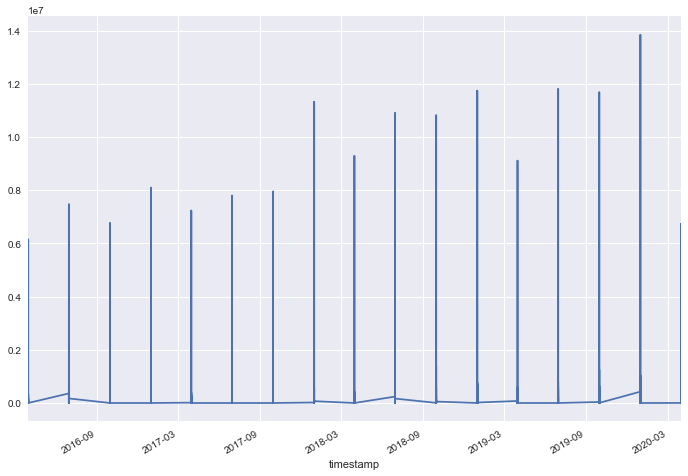

In [40]:
qtr_distributor_demand.set_index('timestamp')['siv_demand'].plot()

In [41]:
unpiv_df.to_excel('demand_trend_all_years_long_format.xlsx')

In [2]:
unpiv_df = pd.read_pickle('demand_data_long_format.pkl')

unpiv_df['key'] = unpiv_df.Distributor.astype(str)+"-"+unpiv_df.matCode.astype(str)

unpiv_df.head()
# filter all keys where sum demand is zeros .. in all years 2016-2020
sum_demand_key =  unpiv_df.groupby('key')['siv_demand'].sum()
zero_keys = sum_demand_key[sum_demand_key ==0].index.tolist()
len(zero_keys)
## filter all such keys where there is no demand for the materials ## 
unpiv_df_f1 = unpiv_df.loc[~unpiv_df.key.isin(zero_keys)]

In [44]:
zero_keys

['A K ENTERPRISES-120082',
 'A K ENTERPRISES-120088',
 'A K ENTERPRISES-120089',
 'A K ENTERPRISES-120182',
 'A K ENTERPRISES-120229',
 'A K ENTERPRISES-120439',
 'A K ENTERPRISES-120441',
 'A K ENTERPRISES-120447',
 'A K ENTERPRISES-120455',
 'A K ENTERPRISES-120612',
 'A K ENTERPRISES-120646',
 'A K ENTERPRISES-120650',
 'A K ENTERPRISES-120919',
 'A K ENTERPRISES-120920',
 'A K ENTERPRISES-120936',
 'A K ENTERPRISES-120938',
 'A K ENTERPRISES-120969',
 'A K ENTERPRISES-121304',
 'A K ENTERPRISES-121530',
 'A K ENTERPRISES-121558',
 'A K ENTERPRISES-121686',
 'A K ENTERPRISES-121700',
 'A K ENTERPRISES-121759',
 'A K ENTERPRISES-121772',
 'A K ENTERPRISES-121778',
 'A K ENTERPRISES-121829',
 'A K ENTERPRISES-121836',
 'A K ENTERPRISES-121842',
 'A K ENTERPRISES-121849',
 'A K ENTERPRISES-121852',
 'A K ENTERPRISES-121892',
 'A K ENTERPRISES-121902',
 'A K ENTERPRISES-121904',
 'A K ENTERPRISES-121907',
 'A K ENTERPRISES-122034',
 'A K ENTERPRISES-122045',
 'A K ENTERPRISES-122058',
 

In [48]:
unpiv_df_f1.shape

(1038650, 4)

In [47]:
unpiv_df_f1.to_pickle('unpiv_df_f1.pkl')

In [49]:
unpiv_df_f1.to_excel('demand_trend_all_years_long_format.xlsx')

In [50]:
unpiv_df_f1.isnull().sum()

Distributor    0
matCode        0
siv_demand     0
key            0
dtype: int64